# Purpose

The goal of this script is to visualize the ratios of read counts in introns, comparing a treatment condition to a control. 
I am going to visualize the ratios using a heatmap in seaborn. 

The data was collected by Lela in May 2018. These are the samples:

* Standard control = minus, no special treatment for enriching intronic reads
* StandardDMS = plus, no special treatment for enriching intronic reads
* Madrasin DMS = plus, treated with madrasin 20 mM for 4 hours to impair the U2 snRNP
* DMSO DMS = plus, treated with DMSO for 4 hours as a control for the Madrasin vehicle
* Fract DMS with BME - plus, standard DMS modification followed by the fraction kit from Abcam for chromatin purification

These will compared as their own group:
* Fract 2 uL DMS no BME - plus, modified DMS procotol with less DMS and no BME quench followed by the fractionation kit
* Fract 15 uL DMS no BME - plus, modified DMS procotol with no BME quench followed by the fractionation kit
* Fract No DMS no BME - minus, no DMS procotol and no BME quench followed by the fractionation kit

Ribominus enrichment was done on the Standard and madrasin samples, but not on the no BME fractionation samples because there wasn't enough RNA

In [45]:
# Import all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [46]:
# Set up the intitial table using the introns coordinates 
introns_coord_data = pd.read_table("../data/NCBI_RefSeq_Curated_hg38_HighlyExpressedGenes_Introns.bed",sep="\t",header=None)
print introns_coord_data.shape
introns_coord_data.head()

(743, 6)


,0,1,2,3,4,5
0,chr1,92832117,92833388,NM_000969.3_intron_0_0_chr1_92832118_f,0,+
1,chr1,92833458,92833544,NM_000969.3_intron_1_0_chr1_92833459_f,0,+
2,chr1,92833660,92834778,NM_000969.3_intron_2_0_chr1_92833661_f,0,+
3,chr1,92834913,92836189,NM_000969.3_intron_3_0_chr1_92834914_f,0,+
4,chr1,92836392,92837455,NM_000969.3_intron_4_0_chr1_92836393_f,0,+


In [47]:
# Sort the coordinates 
introns_coord_data_sorted = introns_coord_data.sort_values(by=[0,1,2,3])
introns_coord_data_sorted.columns = ["chrom","start","end","intronID","score","strand"]
introns_coord_data_sorted.head()

,chrom,start,end,intronID,score,strand
15,chr1,8861429,8862886,NM_001201483.1_intron_0_0_chr1_8861430_r,0,-
23,chr1,8861429,8862886,NM_001428.3_intron_0_0_chr1_8861430_r,0,-
16,chr1,8862945,8863234,NM_001201483.1_intron_1_0_chr1_8862946_r,0,-
24,chr1,8862945,8863234,NM_001428.3_intron_1_0_chr1_8862946_r,0,-
17,chr1,8863343,8863890,NM_001201483.1_intron_2_0_chr1_8863344_r,0,-


In [48]:
# Reset index of coordinates
introns_coord_data_sorted = introns_coord_data_sorted.reset_index(drop=True)
introns_coord_data_sorted.head()

,chrom,start,end,intronID,score,strand
0,chr1,8861429,8862886,NM_001201483.1_intron_0_0_chr1_8861430_r,0,-
1,chr1,8861429,8862886,NM_001428.3_intron_0_0_chr1_8861430_r,0,-
2,chr1,8862945,8863234,NM_001201483.1_intron_1_0_chr1_8862946_r,0,-
3,chr1,8862945,8863234,NM_001428.3_intron_1_0_chr1_8862946_r,0,-
4,chr1,8863343,8863890,NM_001201483.1_intron_2_0_chr1_8863344_r,0,-


In [49]:
# Read in the Count files 
for filename in os.listdir("../tmp/Lela_IntronReadsTest_May2018/"):
    current_columns = list(introns_coord_data_sorted.columns.values)
    if "HighlyExpressedGenesIntrons.txt" in filename and "Quality24_MinLength20_3p" not in filename:
        print filename
        data_to_read = pd.read_csv("../tmp/Lela_IntronReadsTest_May2018/"+filename,header=None,sep="\t")
        data_to_read_sorted = data_to_read.sort_values(by=[0,1,2,3])
        data_to_read_sorted = data_to_read_sorted.reset_index(drop=True)
        introns_coord_data_sorted = pd.concat([introns_coord_data_sorted,data_to_read_sorted[6]],axis=1,ignore_index=True)
        current_columns.append(filename.split("_Aligned")[0])
        introns_coord_data_sorted.columns = current_columns

Fract-NoDMSnoBME_S10_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Standardcontrol_S12_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Fract-2ulDMSnoBME_S9_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
StandardDMS_S11_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Fract-15uLDMSnoBME_S14_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Madrasin-DMS_S7_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Fract-DMSwithBME_S13_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
DMSO-DMS_S8_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt


In [50]:
introns_coord_data_sorted.head()

,chrom,start,end,intronID,score,strand,Fract-NoDMSnoBME_S10,Standardcontrol_S12,Fract-2ulDMSnoBME_S9,StandardDMS_S11,Fract-15uLDMSnoBME_S14,Madrasin-DMS_S7,Fract-DMSwithBME_S13,DMSO-DMS_S8
0,chr1,8861429,8862886,NM_001201483.1_intron_0_0_chr1_8861430_r,0,-,4,20,1,5,3,21,12,16
1,chr1,8861429,8862886,NM_001428.3_intron_0_0_chr1_8861430_r,0,-,4,20,1,5,3,21,12,16
2,chr1,8862945,8863234,NM_001201483.1_intron_1_0_chr1_8862946_r,0,-,3,6,1,5,2,6,5,5
3,chr1,8862945,8863234,NM_001428.3_intron_1_0_chr1_8862946_r,0,-,3,6,1,5,2,6,5,5
4,chr1,8863343,8863890,NM_001201483.1_intron_2_0_chr1_8863344_r,0,-,2,3,2,3,2,10,6,3


## Controls

Comparisons:
1. Madrasin DMS vs DMSO DMS
2. Fract DMS BME vs DMSO DMS
3. DMSO DMS vs Standard Control
4. Frac DMS BME vs Standard Control

In [53]:
introns_coord_data_sorted_dropDups = introns_coord_data_sorted.drop_duplicates(subset=["chrom","start","end"])
print introns_coord_data_sorted_dropDups.shape
introns_coord_data_sorted_dropDups.head()

(510, 14)


,chrom,start,end,intronID,score,strand,Fract-NoDMSnoBME_S10,Standardcontrol_S12,Fract-2ulDMSnoBME_S9,StandardDMS_S11,Fract-15uLDMSnoBME_S14,Madrasin-DMS_S7,Fract-DMSwithBME_S13,DMSO-DMS_S8
0,chr1,8861429,8862886,NM_001201483.1_intron_0_0_chr1_8861430_r,0,-,4,20,1,5,3,21,12,16
2,chr1,8862945,8863234,NM_001201483.1_intron_1_0_chr1_8862946_r,0,-,3,6,1,5,2,6,5,5
4,chr1,8863343,8863890,NM_001201483.1_intron_2_0_chr1_8863344_r,0,-,2,3,2,3,2,10,6,3
6,chr1,8864092,8865284,NM_001201483.1_intron_3_0_chr1_8864093_r,0,-,3,14,3,5,3,7,8,10
8,chr1,8865482,8866278,NM_001201483.1_intron_4_0_chr1_8865483_r,0,-,3,12,1,5,1,10,3,9


In [54]:
# This new dataframe contains all experiments we want to compare
introns_ratios = pd.DataFrame({"MadrasinVsDMSO":introns_coord_data_sorted_dropDups["Madrasin-DMS_S7"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"],
                              "DMSOvsStdCntrl":introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"],
                              "FractVsStdCntrl":introns_coord_data_sorted_dropDups["Fract-DMSwithBME_S13"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"],
                              "FractVsDMSO":introns_coord_data_sorted_dropDups["Fract-DMSwithBME_S13"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]},columns=["MadrasinVsDMSO","DMSOvsStdCntrl","FractVsStdCntrl","FractVsDMSO"])
introns_ratios.index = introns_coord_data_sorted_dropDups["intronID"]
introns_ratios.head()

,MadrasinVsDMSO,DMSOvsStdCntrl,FractVsStdCntrl,FractVsDMSO
intronID,,,,
NM_001201483.1_intron_0_0_chr1_8861430_r,1.312500,0.800000,0.600000,0.750000
NM_001201483.1_intron_1_0_chr1_8862946_r,1.200000,0.833333,0.833333,1.000000
NM_001201483.1_intron_2_0_chr1_8863344_r,3.333333,1.000000,2.000000,2.000000
NM_001201483.1_intron_3_0_chr1_8864093_r,0.700000,0.714286,0.571429,0.800000
NM_001201483.1_intron_4_0_chr1_8865483_r,1.111111,0.750000,0.250000,0.333333


In [55]:
# This is the new dataframe that contains all experiments we want to compare: Log Ratios
introns_log_ratios = pd.DataFrame({"DMSOvsStdCntrl":np.log10(introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                                   "MadrasinVsDMSO":np.log10(introns_coord_data_sorted_dropDups["Madrasin-DMS_S7"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                              "FractVsStdCntrl":np.log10(introns_coord_data_sorted_dropDups["Fract-DMSwithBME_S13"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                                   "MadrasinVsStdCntrl":np.log10(introns_coord_data_sorted_dropDups["Madrasin-DMS_S7"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                              "FractVsDMSO":np.log10(introns_coord_data_sorted_dropDups["Fract-DMSwithBME_S13"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"])},columns=["DMSOvsStdCntrl","FractVsStdCntrl","MadrasinVsStdCntrl","FractVsDMSO","MadrasinVsDMSO"])
introns_log_ratios.index = introns_coord_data_sorted_dropDups["intronID"]
introns_log_ratios.head()

,DMSOvsStdCntrl,FractVsStdCntrl,MadrasinVsStdCntrl,FractVsDMSO,MadrasinVsDMSO
intronID,,,,,
NM_001201483.1_intron_0_0_chr1_8861430_r,-0.096910,-0.221849,0.021189,-0.124939,0.118099
NM_001201483.1_intron_1_0_chr1_8862946_r,-0.079181,-0.079181,0.000000,0.000000,0.079181
NM_001201483.1_intron_2_0_chr1_8863344_r,0.000000,0.301030,0.522879,0.301030,0.522879
NM_001201483.1_intron_3_0_chr1_8864093_r,-0.146128,-0.243038,-0.301030,-0.096910,-0.154902
NM_001201483.1_intron_4_0_chr1_8865483_r,-0.124939,-0.602060,-0.079181,-0.477121,0.045757


In [56]:
# Sort the log ratios based on DMSO vs Std Cntrl 
introns_log_ratios_sorted = introns_log_ratios.sort_values(by=["MadrasinVsStdCntrl"])
introns_log_ratios_sorted.head()

,DMSOvsStdCntrl,FractVsStdCntrl,MadrasinVsStdCntrl,FractVsDMSO,MadrasinVsDMSO
intronID,,,,,
NM_001003.2_intron_1_0_chr15_69453722_f,-0.327359,-0.385351,-0.753328,-0.057992,-0.425969
NM_021103.3_intron_1_0_chr2_84906118_f,-0.221849,-0.221849,-0.698970,0.000000,-0.477121
NM_001135592.2_intron_0_0_chr2_55232109_f,-0.698970,-0.397940,-0.698970,0.301030,0.000000
NM_001256799.2_intron_0_0_chr12_6535470_f,-0.277118,-0.548185,-0.682883,-0.271067,-0.405765
NM_019111.4_intron_3_0_chr6_KI270758v1_alt_12286_r,-0.602060,-0.903090,-0.602060,-0.301030,0.000000


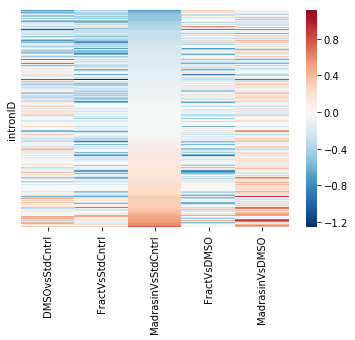

In [57]:
# Plot heatmap
ax = sns.heatmap(introns_log_ratios_sorted,cmap="RdBu_r",yticklabels=False,center=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
#plt.tight_layout()
plt.show()

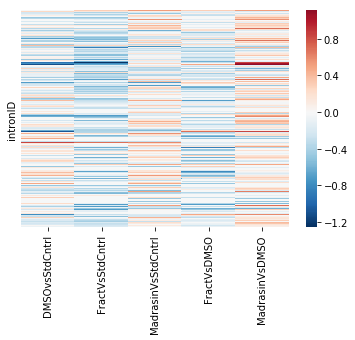

In [58]:
# Plot heatmap unsorted data
ax = sns.heatmap(introns_log_ratios,cmap="RdBu_r",yticklabels=False,center=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
#plt.tight_layout()
plt.show()

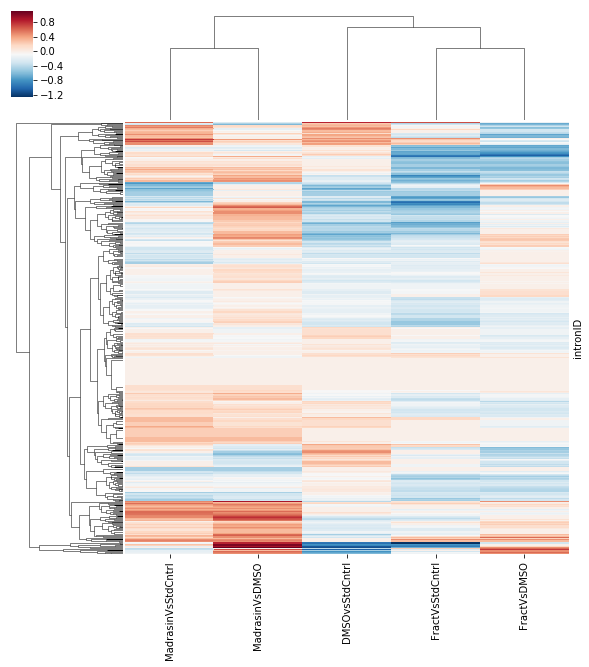

In [59]:
# Plot correlation map
ax = sns.clustermap(introns_log_ratios,cmap="RdBu_r",yticklabels=False)
plt.show()

In [60]:
# This new dataframe contains all experiments we want to compare
introns_ratios_to_write = pd.DataFrame({"MadrasinVsDMSO":introns_coord_data_sorted_dropDups["Madrasin-DMS_S7"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"],
                              "DMSOvsStdCntrl":introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"],
                              "FractVsStdCntrl":introns_coord_data_sorted_dropDups["Fract-DMSwithBME_S13"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"],
                              "FractVsDMSO":introns_coord_data_sorted_dropDups["Fract-DMSwithBME_S13"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]},columns=["MadrasinVsDMSO","DMSOvsStdCntrl","FractVsStdCntrl","FractVsDMSO"])
introns_ratios_to_write.to_csv("../tmp/Lela_IntronReadsTest_May2018/Introns_Ratio.tsv",sep="\t",header=True,index=False)